In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as smp
import scienceplots
from prereqs.vecs_and_curves import *
from sklearn.preprocessing import normalize

plt.style.use(['science', 'notebook', 'grid'])

In [2]:

def create_rs(start, end, steps):
    z = y = x = start
    q = []
    
    while x <= end:
        while y <= end:
            while z <= end:
                q.append([x, y, z])
                z += steps

            z = 0
            y += steps
        y = 0
        x += steps
         
        
    return np.array(q)

r_ps = create_rs(-5, 5, 1)
r_ps

array([[-5, -5, -5],
       [-5, -5, -4],
       [-5, -5, -3],
       ...,
       [ 5,  5,  3],
       [ 5,  5,  4],
       [ 5,  5,  5]])

In [3]:
s, ds = smp.symbols('s ds')
s

s

In [4]:

r_dl = Vector(smp.cos(s), smp.sin(s), 0)
r_dl_prime = r_dl.differentiate()
r_dl.vector

Matrix([
[cos(s)],
[sin(s)],
[     0]])

In [5]:
r_p_index = 2
r_p = Vector(r_ps[r_p_index][0], r_ps[r_p_index][1], r_ps[r_p_index][2])
r_p_dl = r_p - r_dl
r_p_dl

Matrix([
[-cos(s) - 5],
[-sin(s) - 5],
[         -3]])

In [6]:

db = (r_dl_prime.cross(r_p_dl)/(r_p_dl.norm() ** 3))
db = Vector(db[0], db[1], db[2])
db.vector

Matrix([
[                                     -3*cos(s)/(Abs(sin(s) + 5)**2 + Abs(cos(s) + 5)**2 + 9)**(3/2)],
[                                     -3*sin(s)/(Abs(sin(s) + 5)**2 + Abs(cos(s) + 5)**2 + 9)**(3/2)],
[(-(-sin(s) - 5)*sin(s) - (-cos(s) - 5)*cos(s))/(Abs(sin(s) + 5)**2 + Abs(cos(s) + 5)**2 + 9)**(3/2)]])

In [7]:
db_f = db.convert_to_function(s)   
b = integrate_function(db_f, [0, np.pi])

b

array([[ 0.00221518],
       [-0.01092392],
       [ 0.02049363]])

/tmp/ipykernel_17201/1703693444.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


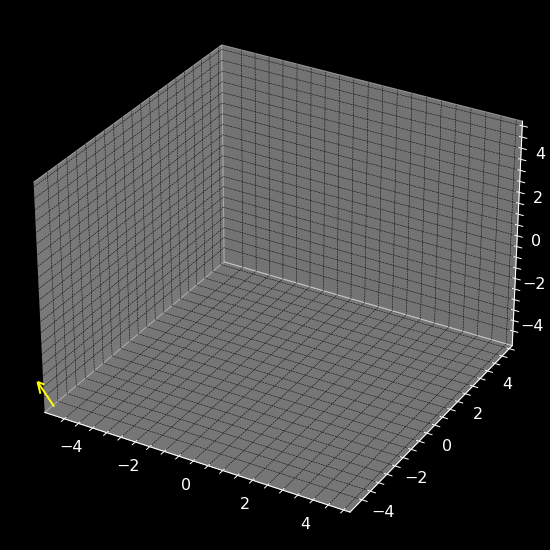

In [8]:
fig = plt.figure(figsize=(18,10))
ax = fig.gca(projection='3d')

r_p = np.array([-5, -5, -5])

ax.quiver(r_p[0], r_p[1], r_p[2], b[0], b[1], b[2], color = 'yellow', length = 100)
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.set_zlim(-5, 5)
plt.show()

In [5]:
# do the same process for all points ie r_p

r_p_index = 0
b = []
while r_p_index < len(r_ps):
    r_p = Vector(r_ps[r_p_index][0], r_ps[r_p_index][1], r_ps[r_p_index][2])
    r_p_dl = r_p - r_dl
    
    db = (r_dl_prime.cross(r_p_dl)/(r_p_dl.norm() ** 3))
    db = Vector(db[0], db[1], db[2])
    
    db_f = db.convert_to_function(s)   
    b.append(integrate_function(db_f, [0, np.pi]))
    
    r_p_index += 1
    
b = np.array(b)
b[400]

array([[0.00662014],
       [0.02813688],
       [0.0023287 ]])

In [10]:
r_p_index = 215
print(b[r_p_index], r_ps[r_p_index])


[[0.        ]
 [0.        ]
 [3.14159265]] [0 0 0]


/tmp/ipykernel_17201/1409733576.py:4: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


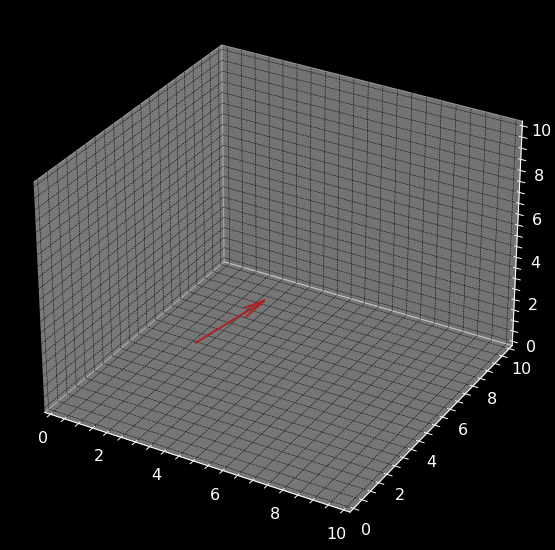

In [11]:
r_p_index = 400

fig = plt.figure(figsize=(18,10))
ax = fig.gca(projection='3d')

r_p = r_ps[r_p_index]

ax.quiver(r_p[0], r_p[1], r_p[2], b[r_p_index][0], b[r_p_index][1], b[r_p_index][2], color = '#ad2323', length = 100)
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.set_zlim(0, 10)
plt.show()

In [12]:
idx = 0
b_m = []

while idx < len(b):
    b_i = []

    for i in b[idx]:
        b_i.append(i[0])
        
    b_m.append(b_i)
    
    idx += 1



In [13]:
def tanh(arr, n):
    return (np.e**(n*arr) - np.e**(-n*arr))/(np.e**(n*arr) + np.e**(-n*arr))

In [14]:
b_m = np.array(b_m)

for i in b_m:
    mag = np.linalg.norm(i)
    i /= mag
    i *= tanh(mag, n = 25)
    
b_m[215]

/tmp/ipykernel_17201/3087273071.py:2: RuntimeWarning: overflow encountered in double_scalars
  return (np.e**(n*arr) - np.e**(-n*arr))/(np.e**(n*arr) + np.e**(-n*arr))
/tmp/ipykernel_17201/3087273071.py:2: RuntimeWarning: invalid value encountered in double_scalars
  return (np.e**(n*arr) - np.e**(-n*arr))/(np.e**(n*arr) + np.e**(-n*arr))


array([0., 0., 1.])

/tmp/ipykernel_17201/1743950689.py:4: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


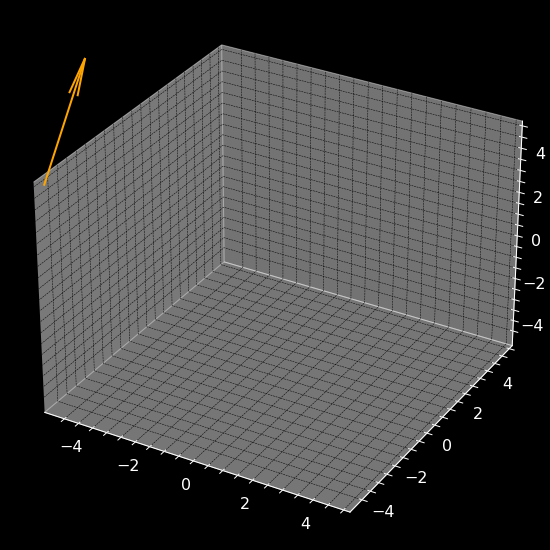

In [18]:
r_p_index = 10

fig = plt.figure(figsize=(18,10))
ax = fig.gca(projection='3d')

r_p = r_ps[r_p_index]
b_m_p = b_m[r_p_index]

ax.quiver(float(r_p[0]), r_p[1], r_p[2], b_m_p[0], b_m_p[1], b_m_p[2], color = 'orange', length = 10)
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.set_zlim(-5, 5)


plt.show()

In [19]:
x_ps = []
for i in r_ps:
    x_ps.append(i[0])
    
y_ps = []
for i in r_ps:
    y_ps.append(i[1])
    
z_ps = []
for i in r_ps:
    z_ps.append(i[2])

In [20]:
x_bm = []
for i in b_m:
    x_bm.append(i[0])
    
y_bm = []
for i in b_m:
    y_bm.append(i[1])
    
z_bm = []
for i in b_m:
    z_bm.append(i[2])

In [22]:
z_bm

[0.3539802525951197,
 0.4082844247511396,
 0.4611982315551878,
 0.5069746864762676,
 0.5386881205877202,
 0.5501229024894421,
 0.5386881205877202,
 0.5069746864762676,
 0.4611982315551878,
 0.4082844247511396,
 0.3539802525951197,
 0.569242422631552,
 0.5549629022925926,
 0.516571581101312,
 0.4635524091389526,
 0.4046880874702887,
 0.34612792001179377,
 0.5409171463468242,
 0.5244756786019118,
 0.48263232339519,
 0.4284912698916052,
 0.37090479830760764,
 0.3148008624997025,
 0.41378842180850284,
 0.4019165409517973,
 0.37329478579447034,
 0.336768281623914,
 0.29608544077958726,
 0.2540343320508927,
 0.1119137297667065,
 0.12968376411888335,
 0.16030821158712275,
 0.17749719563755323,
 0.17664694400229927,
 0.16303299419172299,
 -0.3175415170908913,
 -0.24913270621858494,
 -0.12454156531549823,
 -0.029048136817653038,
 0.02512630038651806,
 0.04978633488038806,
 -0.623986579205754,
 -0.5422089953947924,
 -0.3769509549533226,
 -0.2303918379916052,
 -0.1305767782276184,
 -0.06963427748

In [23]:
t = np.linspace(0, np.pi, 100)
wire = Curve(np.cos(t), np.sin(t), 0*t, t)

/tmp/ipykernel_17201/764132024.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


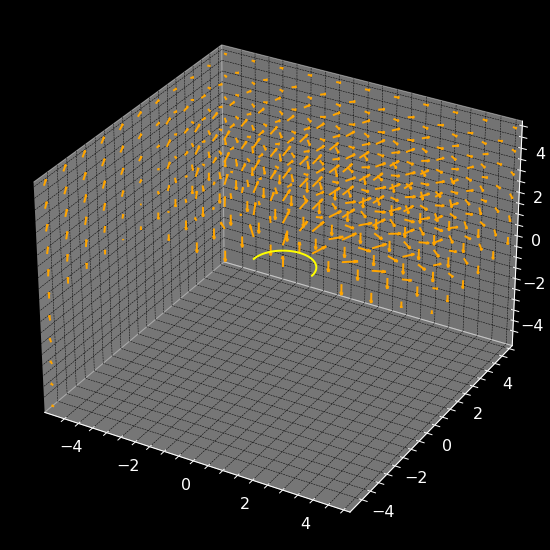

In [24]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')

ax.quiver(x_ps, y_ps, z_ps, x_bm, y_bm, z_bm, color = 'orange', length = 0.5)
ax.plot3D(wire.x, wire.y, wire.z, color='yellow')
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.set_zlim(-5, 5)

plt.show()